In [ ]:
import os
import math
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
from sklearn.decomposition import PCA

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


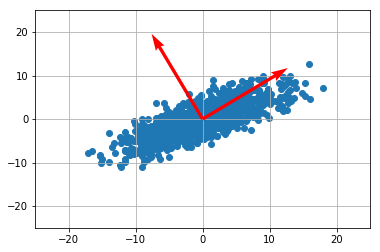

In [3]:
#----------------------------------------------------------------------------------------#

mean = [0,0]
cov = [[40,25],[10,1]]

x1,x2 = np.random.multivariate_normal(mean,cov,1000).T

X = np.c_[x1,x2]

plt.xlim(-25.0,25.0)
plt.ylim(-25.0,25.0)
plt.grid()

plt.scatter(X[:,0],X[:,1])

#----------------------------------------------------------------------------------------#

pca = PCA(n_components=2)

pca.fit(X)

#print(pca.explained_variance_ratio_) 
#print(pca.components_)

axis = pca.components_.T
axis /= axis.std()
x_axis, y_axis = axis

plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=1 )
plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6, color='red')

plt.savefig('pca_example_1.png')
plt.show()

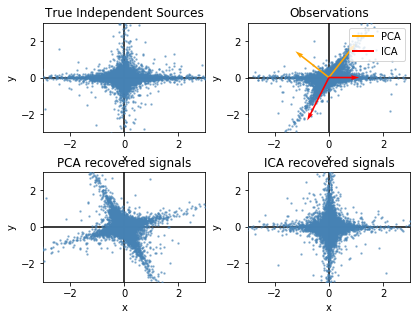

In [4]:
# Authors: Alexandre Gramfort, Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, FastICA

rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(random_state=rng)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)

def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color=color)

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T, ica.mixing_]

plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA', 'ICA'], loc='upper right')
legend.set_zorder(100)

plt.title('Observations')

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title('PCA recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)

plt.savefig('pca_example_2.png',bbox_inches='tight')
plt.show()